<h1><center> Exercise </center></h1>
Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df
##it tells the intensity of colour of each pixel in 8X8 image

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
X = df.drop(['target'],axis = 1)
y = df.target

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [8]:
model.predict(X_test)

array([1, 0, 2, 5, 0, 5, 4, 7, 5, 0, 6, 2, 7, 5, 8, 0, 1, 7, 8, 6, 9, 4,
       4, 9, 4, 1, 7, 1, 0, 2, 0, 4, 8, 4, 1, 6, 7, 4, 7, 1, 0, 3, 2, 2,
       2, 0, 2, 1, 1, 4, 6, 9, 4, 8, 7, 6, 4, 7, 5, 1, 3, 9, 7, 0, 1, 3,
       1, 6, 1, 0, 3, 3, 9, 5, 6, 1, 3, 2, 1, 2, 9, 5, 0, 1, 1, 1, 8, 4,
       3, 1, 4, 2, 5, 2, 4, 9, 9, 7, 2, 0, 9, 9, 8, 4, 2, 7, 8, 8, 6, 5,
       4, 2, 6, 7, 0, 7, 6, 3, 3, 8, 3, 5, 3, 4, 0, 8, 2, 8, 4, 2, 0, 4,
       1, 2, 8, 4, 8, 9, 8, 5, 2, 2, 7, 7, 9, 6, 1, 5, 9, 7, 3, 2, 3, 6,
       7, 5, 7, 9, 1, 3, 9, 1, 8, 6, 5, 2, 5, 6, 2, 8, 6, 1, 7, 4, 7, 3,
       0, 1, 5, 2, 7, 2, 4, 7, 1, 6, 7, 3, 3, 7, 3, 8, 0, 5, 6, 2, 0, 3,
       4, 9, 9, 3, 8, 7, 8, 6, 6, 6, 4, 5, 9, 4, 9, 8, 1, 7, 3, 0, 8, 3,
       6, 9, 4, 6, 1, 9, 1, 7, 3, 6, 5, 1, 5, 4, 3, 4, 9, 0, 4, 3, 8, 0,
       4, 1, 9, 2, 3, 4, 9, 6, 2, 0, 5, 1, 3, 2, 3, 6, 0, 0, 3, 1, 2, 1,
       8, 6, 0, 5, 0, 8, 8, 0, 9, 5, 7, 2, 1, 4, 8, 9, 5, 8, 0, 4, 4, 0,
       2, 9, 0, 2, 6, 2, 7, 5, 7, 7, 8, 2, 0, 4, 5,

In [9]:
model.score(X_test,y_test)

0.9972222222222222

In [10]:
svm_score = cross_val_score(SVC(),X_test,y_test)
np.average(svm_score)

0.975

### Improving Accuracy

In [29]:
svm_score = cross_val_score(SVC(gamma=0.001,C=100),X_test,y_test)
np.average(svm_score)

0.975

In [33]:
model_enchanced = SVC(C=10)
model_enchanced.fit(X_train,y_train)

SVC(C=10)

In [34]:
model_enchanced.score(X_test,y_testt)

0.9944444444444445

In [35]:
y_pred = model_enchanced.predict(X_test)

In [40]:
cn = confusion_matrix(y_test,y_pred)
cn

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

Text(33.0, 0.5, 'Predicted Value')

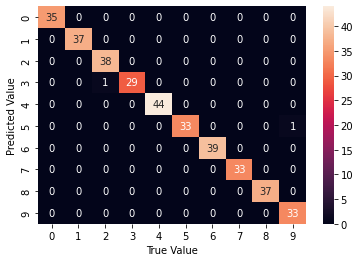

In [44]:
sns.heatmap(cn,annot = True)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')